# Constructing the training image

In [24]:
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
import copy
import pandas as pd

In [2]:

im = Image.new('1', (128, 128), 0)
# mode = '1': black / white
# see https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
draw = ImageDraw.Draw(im)

In [3]:
#draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
#draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))
#draw.line((350, 200, 450, 100), fill=(255, 255, 0), width=10)

#im.save('pillow_imagedraw.jpg', quality=95)


In [4]:
draw.regular_polygon((50, 50, 10), 3, rotation=0, fill=None, outline=1)

In [5]:
#im.show()

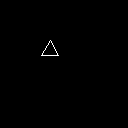

In [6]:
from IPython.display import display
display(im)

# Building the model

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.3.0


In [9]:
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    #model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

    return model

In [10]:
model = get_model()

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 952576)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                60964928  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 61,020,737
Trainable params: 61,020,737
Non-trainable params: 0
____________________________________________

## Save initial weights

We will use the same model for multiple experiments. If we just do *model.fit()* again, the weights will start as trained by the previous experiment. Thus, we save the initial (random) weights here and reload them later.

In [12]:
winit = model.get_weights()

# Preparing the training data

In [13]:
import numpy as np

In [67]:
train_images = np.array(im, dtype=np.double)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=0)
print(train_images.shape)
train_images = np.expand_dims(train_images, axis=train_images.ndim)
print(train_images.shape)

train_labels = np.array((1))
print(train_labels.shape)
train_labels = np.expand_dims(train_labels, axis=0)
print(train_labels.shape)


(128, 128)
(1, 128, 128)
(1, 128, 128, 1)
()
(1,)


# Evaluate w/ initial weights

In [68]:
model.set_weights(winit)
evalinit_train = model.evaluate(x=train_images, y=train_labels)
print(evalinit_train)
print(model.metrics_names)

1/1 [==============================] - 1s 1s/sample - loss: 0.6971 - accuracy: 0.0000e+00
[0.6970730423927307, 0.0]
['loss', 'accuracy']


In [69]:
print(model.predict(train_images))

[[0.49804094]]


# Training

In [17]:
model.set_weights(winit)
history = model.fit(train_images, train_labels, epochs=10)#, 
#                    validation_data=(test_images, test_labels))


Train on 1 samples
Epoch 1/10
1/1 [==============================] - 4s 4s/sample - loss: 0.6971 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 3s 3s/sample - loss: 0.5349 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 889ms/sample - loss: 0.1152 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 3s 3s/sample - loss: 7.6873e-04 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 217ms/sample - loss: 9.1433e-08 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/sample - loss: 3.1106e-13 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/sample - loss: 4.8493e-20 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 404ms/sample - loss: 6.0043e-28 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 313ms/sample - loss: 1.0051e-36 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 263ms/sample -

In [18]:
print(model.predict(train_images))

[[1.]]


In [19]:
import pandas as pd
import copy

In [20]:
hist = copy.deepcopy(history.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
history_df = pd.DataFrame(hist)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

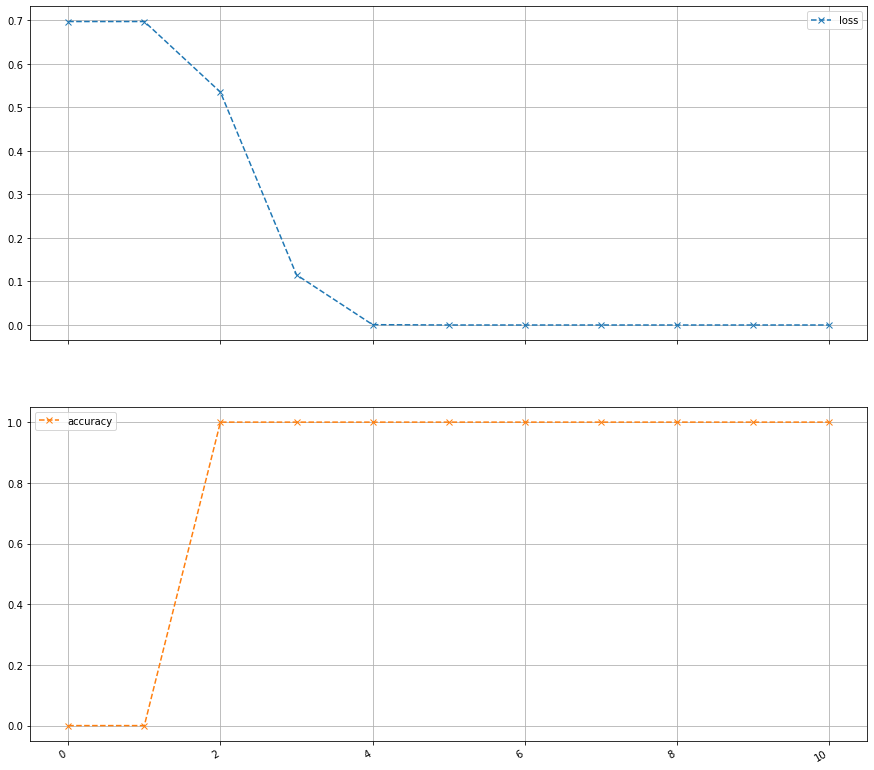

In [21]:
#fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
#history_df.plot(y='loss', ax=axs[0])
#history_df.plot(y='accuracy', ax=axs[1])
history_df.plot(subplots=True, sharex=True, figsize=(15, 15), grid=True, marker='x', ls='--')

So far so good; it learns something.

# Preparing the test image

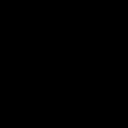

In [70]:
im_test_blank = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_blank)
display(im_test_blank)

test_image_blank = np.array(im_test_blank, dtype=np.double)
test_image_blank = np.expand_dims(test_image_blank, axis=0)
test_image_blank = np.expand_dims(test_image_blank, axis=test_image_blank.ndim)

test_labels = np.array((0))
test_labels = np.expand_dims(test_labels, axis=0)


## Evaluate test w/ initial weights

In [71]:
model.set_weights(winit)
evalinit_test = model.evaluate(x=test_image_blank, y=test_labels)
print(evalinit_test)
print(model.metrics_names)

1/1 [==============================] - 0s 69ms/sample - loss: 0.6931 - accuracy: 1.0000
[0.6931471824645996, 1.0]
['loss', 'accuracy']


In [72]:
print(model.predict(test_image_blank))

[[0.5]]


# Training with validation on blank test image

In [73]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_blank, test_labels))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 1s 657ms/sample - loss: 0.6971 - accuracy: 0.0000e+00 - val_loss: 0.7239 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 376ms/sample - loss: 0.4776 - accuracy: 1.0000 - val_loss: 1.1859 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 418ms/sample - loss: 0.0948 - accuracy: 1.0000 - val_loss: 3.6166 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 356ms/sample - loss: 9.7579e-04 - accuracy: 1.0000 - val_loss: 8.3378 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 379ms/sample - loss: 6.9053e-07 - accuracy: 1.0000 - val_loss: 14.9378 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 372ms/sample - loss: 4.3650e-11 - accuracy: 1.0000 - val_loss: 23.2068 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 361ms/sampl

In [74]:
print(model.predict(test_image_blank))

[[1.]]


In [75]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test, test_metrics_names):
    hist[name].insert(0, init_val)

<AxesSubplot:>

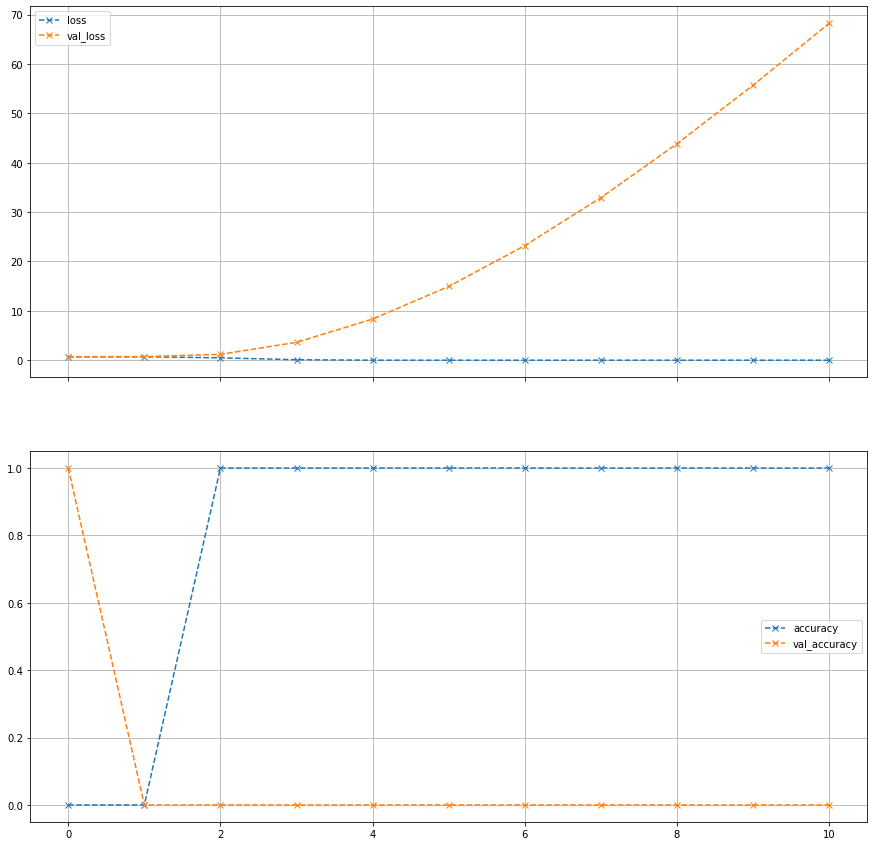

In [76]:
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

It is not surprising that the validation loss goes up on the "empty" test image. It has no chance to learn for an "empty" image. The learnable classes are imbalanced in the training set: "Empty" / "no triangle" is not represented in training at all and the model can easily overfit on the one training sample.

# Training w/ validation on "something"

Not empty, but also no triangle.

I assume, we get a false-positive again. That would fit the class imbalance-/ overfit-hypothesis, which means the model probably outputs $1$ ("there is a triangle") every time.

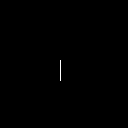

In [77]:
im_test_blank = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_blank)
draw.line(((60, 60), (60, 80)), width=1, fill=1)
display(im_test_blank)

test_image_line = np.array(im_test_blank, dtype=np.double)
test_image_line = np.expand_dims(test_image_line, axis=0)
test_image_line = np.expand_dims(test_image_line, axis=test_image_line.ndim)

test_labels = np.array((0))
test_labels = np.expand_dims(test_labels, axis=0)


In [78]:
model.set_weights(winit)
evalinit_test = model.evaluate(x=test_image_line, y=test_labels)
print(evalinit_test)
print(model.metrics_names)

1/1 [==============================] - 0s 53ms/sample - loss: 0.6932 - accuracy: 0.0000e+00
[0.6932271122932434, 0.0]
['loss', 'accuracy']


In [79]:
print(model.predict(test_image_line))

[[0.50003994]]


In [80]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_line, test_labels))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 0s 428ms/sample - loss: 0.6971 - accuracy: 0.0000e+00 - val_loss: 0.8114 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 345ms/sample - loss: 0.4453 - accuracy: 1.0000 - val_loss: 2.0135 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 337ms/sample - loss: 0.0510 - accuracy: 1.0000 - val_loss: 6.3976 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 369ms/sample - loss: 1.9541e-04 - accuracy: 1.0000 - val_loss: 13.6161 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 337ms/sample - loss: 3.8069e-08 - accuracy: 1.0000 - val_loss: 23.3486 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 373ms/sample - loss: 4.8398e-13 - accuracy: 1.0000 - val_loss: 35.3230 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 349ms/samp

In [81]:
print(model.predict(test_image_line))

[[1.]]


In [82]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test, test_metrics_names):
    hist[name].insert(0, init_val)

<AxesSubplot:>

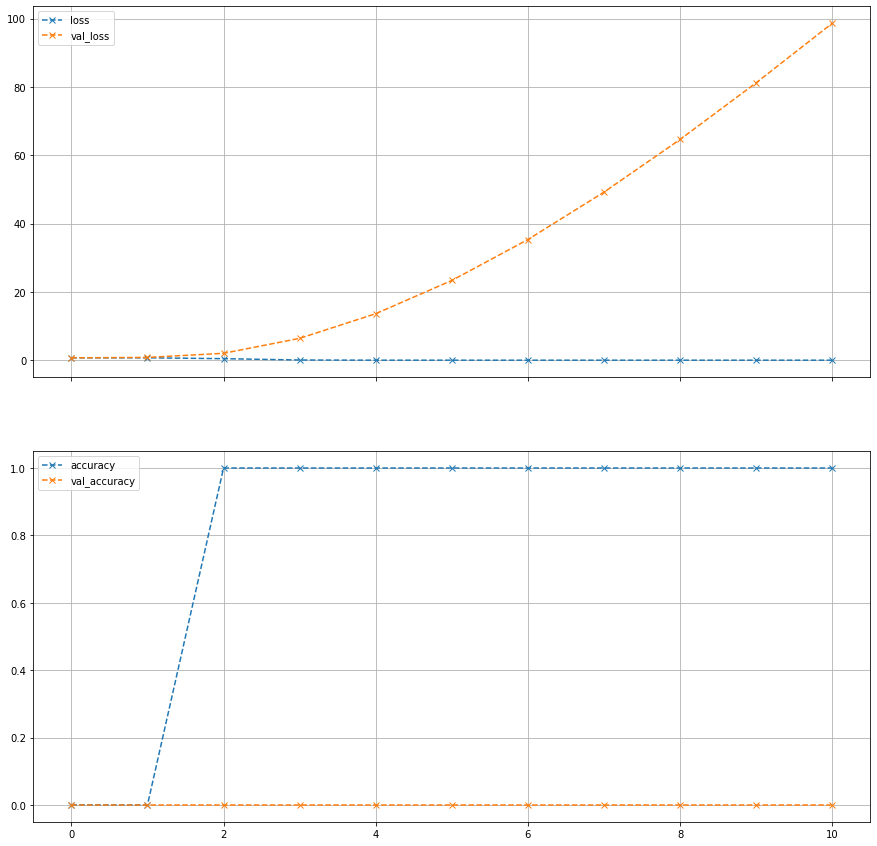

In [83]:
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

# Training w/ test on triangle in another place

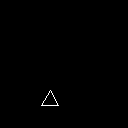

In [20]:
im_test_triangle_lowleft = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_test_triangle_lowleft)
draw.regular_polygon((50, 100, 10), 3, rotation=0, fill=None, outline=1)
display(im_test_triangle_lowleft)

test_image_triangle_lowleft = np.array(im_test_triangle_lowleft, dtype=np.double)
test_image_triangle_lowleft = np.expand_dims(test_image_triangle_lowleft, axis=0)
test_image_triangle_lowleft = np.expand_dims(test_image_triangle_lowleft, axis=test_image_triangle_lowleft.ndim)

test_labels_triangle_lowleft = np.array((1))
test_labels_triangle_lowleft = np.expand_dims(test_labels_triangle_lowleft, axis=0)


In [26]:
model.set_weights(winit)
evalinit_test_triangle_lowleft = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)
print(evalinit_test_triangle_lowleft)
print(model.metrics_names)

1/1 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 1.0000
[0.6926212310791016, 1.0]
['loss', 'accuracy']


In [86]:
print(model.predict(test_image_triangle_lowleft))

[[0.50022435]]


In [87]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))


Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 2s 2s/sample - loss: 0.6971 - accuracy: 0.0000e+00 - val_loss: 0.5354 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 353ms/sample - loss: 0.4469 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 343ms/sample - loss: 0.0411 - accuracy: 1.0000 - val_loss: 2.6229e-04 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 332ms/sample - loss: 9.8185e-05 - accuracy: 1.0000 - val_loss: 3.7418e-08 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 312ms/sample - loss: 8.8744e-09 - accuracy: 1.0000 - val_loss: 2.6115e-13 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 502ms/sample - loss: 3.8397e-14 - accuracy: 1.0000 - val_loss: 1.1680e-19 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/sample - loss: 1.0620

In [88]:
print(model.predict(test_image_triangle_lowleft))

[[1.]]


<AxesSubplot:>

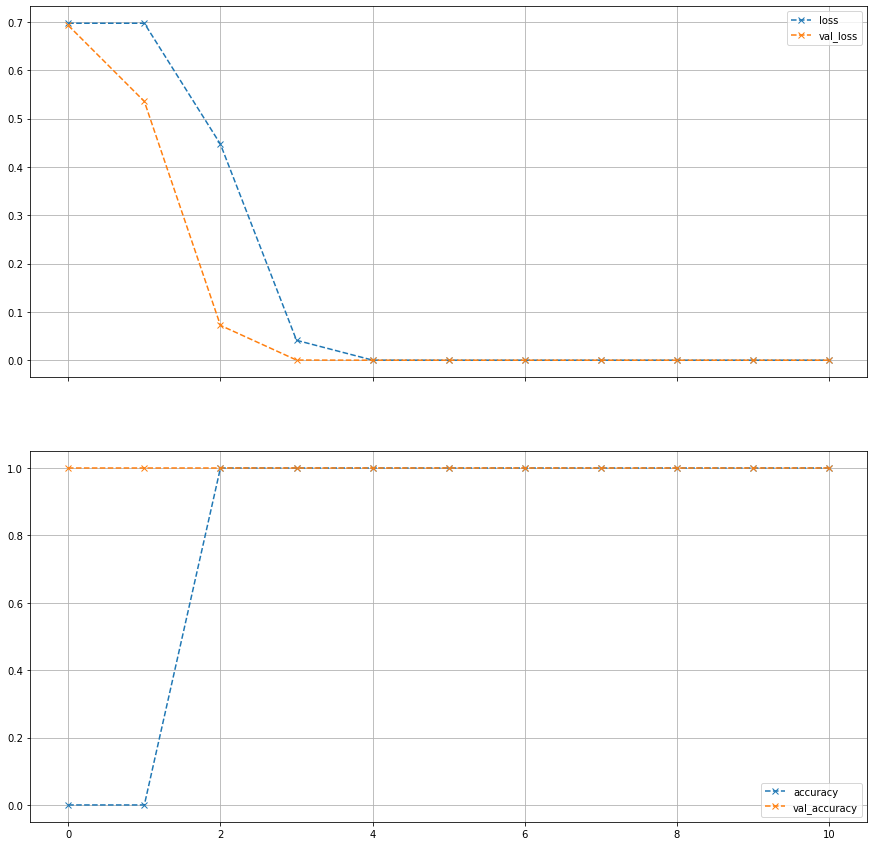

In [89]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
    hist[name].insert(0, init_val)
    
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

The model either has learned to detect triangles in any position or just predicts triangles every time. The previous experiments show that probably the latter one is true.

# Testing dependency on weight initialization

## w/ test on triangle in another place

In [42]:
histories = {}

for runid in range(20):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test_triangle_lowleft = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                        validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_train, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories.update(hist)

1/1 [==============================] - 0s 151ms/sample - loss: 0.6957 - accuracy: 0.0000e+00
Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 8s 8s/sample - loss: 0.6924 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 809ms/sample - loss: 0.4375 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 960ms/sample - loss: 0.0078 - accuracy: 1.0000 - val_loss: 9.2116e-06 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/sample - loss: 1.0151e-06 - accuracy: 1.0000 - val_loss: 6.6894e-11 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 425ms/sample - loss: 3.0254e-12 - accuracy: 1.0000 - val_loss: 1.9768e-17 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 696ms/sample - loss: 3.6867e-19 - accuracy: 1.0000 - val_loss: 5.0036e-25 - val_accuracy

<AxesSubplot:>

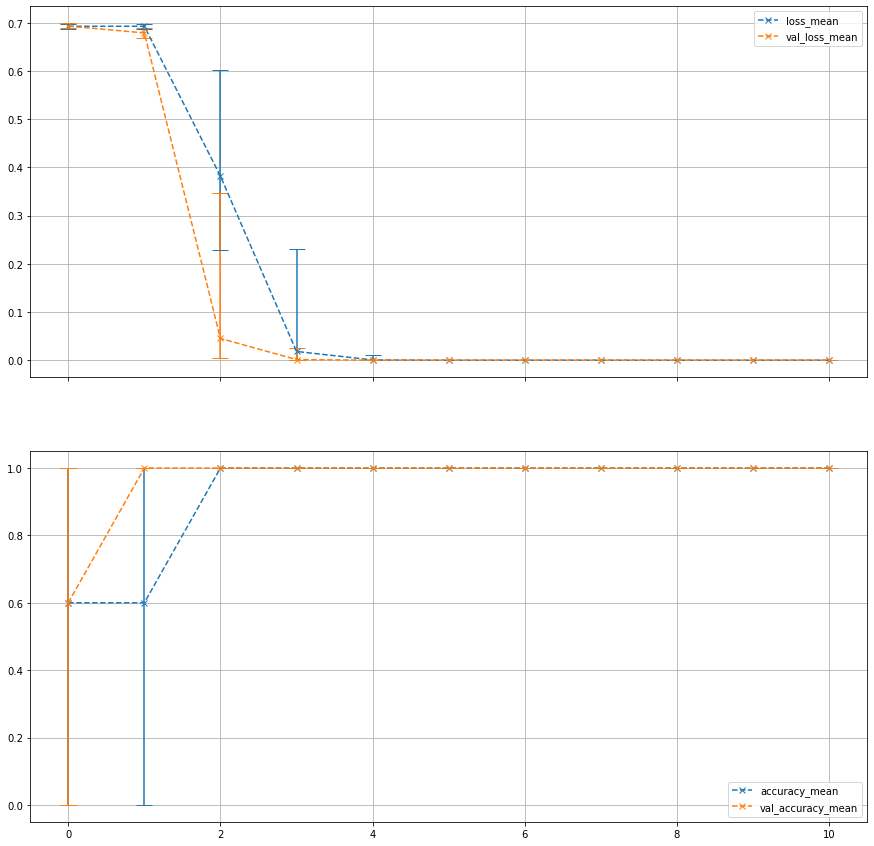

In [43]:
histories_df = pd.DataFrame(histories)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)


## with validation on blank test image

In [44]:
histories_blank = {}

for runid in range(20):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test = model.evaluate(x=test_image_blank, y=test_labels)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_blank, test_labels))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_train, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories_blank.update(hist)

1/1 [==============================] - 0s 59ms/sample - loss: 0.6931 - accuracy: 1.0000
Train on 1 samples, validate on 1 samples
Epoch 1/10
1/1 [==============================] - 10s 10s/sample - loss: 0.6933 - accuracy: 0.0000e+00 - val_loss: 0.7125 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 395ms/sample - loss: 0.3127 - accuracy: 1.0000 - val_loss: 4.1550 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 1s/sample - loss: 8.4155e-04 - accuracy: 1.0000 - val_loss: 12.5782 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 501ms/sample - loss: 1.4678e-08 - accuracy: 1.0000 - val_loss: 24.4790 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 356ms/sample - loss: 6.2485e-15 - accuracy: 1.0000 - val_loss: 39.1194 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 380ms/sample - loss: 1.4888e-22 - accuracy: 1.0000 - val_loss: 55.8010 -

<AxesSubplot:>

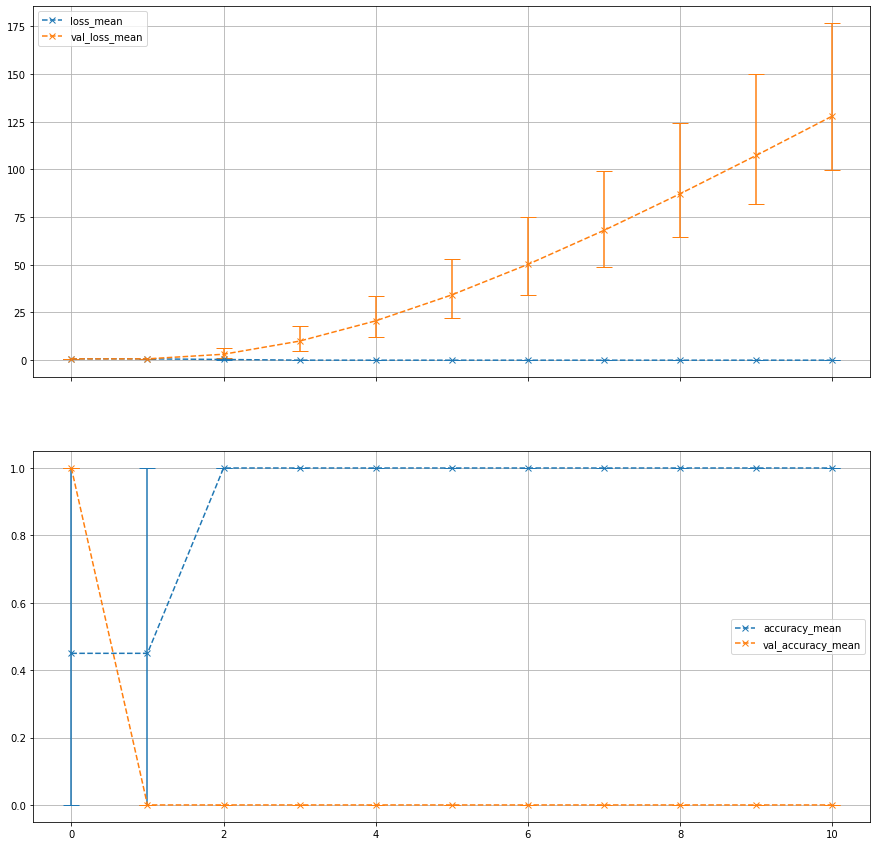

In [45]:
histories_df = pd.DataFrame(histories_blank)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)


# Include one no-triangle image in training

The model needs to learn that not everything is a triangle. Let's provide the "minimum" sample for "no triangle": a blank.

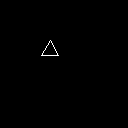

In [13]:
im_triangle = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_triangle)
draw.regular_polygon((50, 50, 10), 3, rotation=0, fill=None, outline=1)
display(im_triangle)

train_image_triangle = np.array(im_triangle, dtype=np.double)
train_image_triangle = np.expand_dims(train_image_triangle, axis=0)
train_image_triangle = np.expand_dims(train_image_triangle, axis=train_image_triangle.ndim)

train_label_triangle = np.array((1))
train_label_triangle = np.expand_dims(train_label_triangle, axis=0)


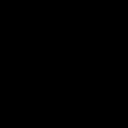

In [14]:
im_circle = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_circle)
#draw.ellipse(((50 - 10, 50 - 10), (50 + 10, 50 + 10)), fill=None, outline=1)
display(im_circle)

train_image_circle = np.array(im_circle, dtype=np.double)
train_image_circle = np.expand_dims(train_image_circle, axis=0)
train_image_circle = np.expand_dims(train_image_circle, axis=train_image_circle.ndim)

train_label_circle = np.array((0))
train_label_circle = np.expand_dims(train_label_circle, axis=0)


In [134]:
train_images = np.concatenate((train_image_triangle, train_image_circle), axis=0)
train_labels = np.concatenate((train_label_triangle, train_label_circle), axis=0)

In [135]:
model.set_weights(winit)
evalinit_train = model.evaluate(x=train_images, y=train_labels)
print(evalinit_train)
print(model.metrics_names)

2/1 [============================================================] - 3s 2s/sample - loss: 0.6951 - accuracy: 0.5000
[0.6951100826263428, 0.5]
['loss', 'accuracy']


In [136]:
print(model.predict(train_images))

[[0.49804094]
 [0.5       ]]


In [137]:
-np.log(1-model.predict(train_images)[1])/2-np.log(model.predict(train_images)[0])/2

array([0.6951101], dtype=float32)

In [139]:
print(model.predict(test_image_triangle_lowleft))

[[0.50022435]]


In [140]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))


Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 3s 2s/sample - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6733 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 1s 445ms/sample - loss: 0.6514 - accuracy: 0.5000 - val_loss: 0.6776 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 1s 558ms/sample - loss: 0.5304 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 577ms/sample - loss: 0.3955 - accuracy: 1.0000 - val_loss: 0.9722 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 216ms/sample - loss: 0.2460 - accuracy: 1.0000 - val_loss: 1.8155 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 214ms/sample - loss: 0.1002 - accuracy: 1.0000 - val_loss: 4.0392 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 219ms/sample - loss: 0.0165 - accuracy: 

In [141]:
print(model.predict(train_images))

[[0.99877053]
 [0.        ]]


In [142]:
-np.log(1-model.predict(train_images)[1])/2

array([-0.], dtype=float32)

In [143]:
print(model.predict(test_image_triangle_lowleft))

[[0.]]


<AxesSubplot:>

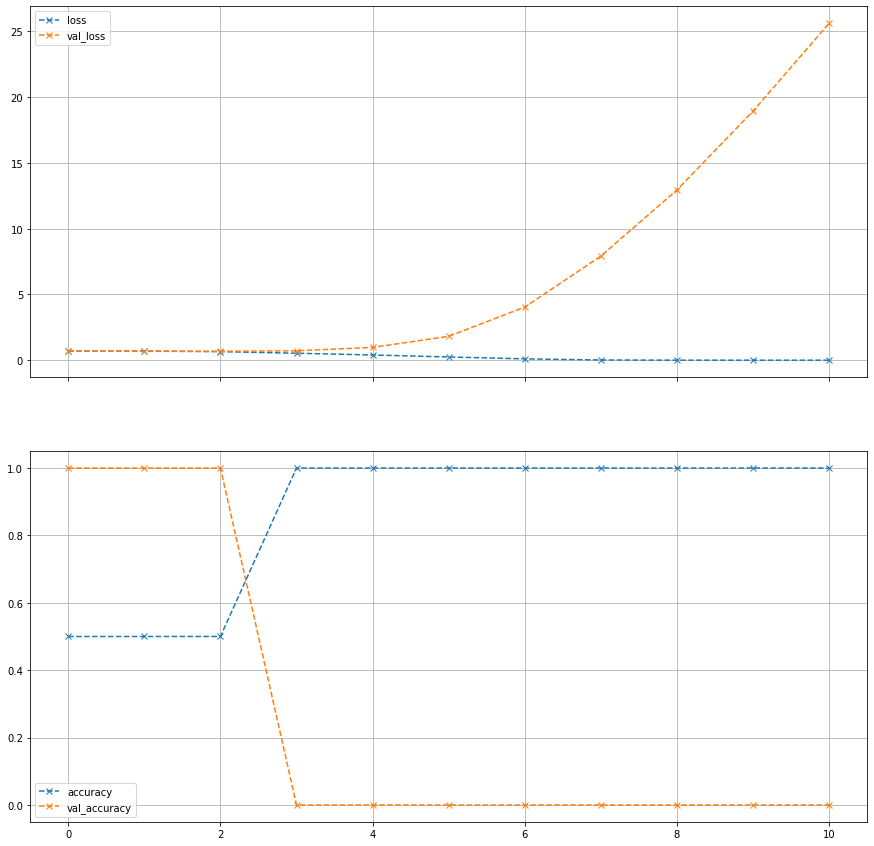

In [144]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
    hist[name].insert(0, init_val)
    
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

Now, it shows that we will probably not train the model to detect the triangle in every position just with this one training sample, if we don't want it to declare everything a triangle.

## test dependency on weight initialization

In [128]:
#histories_wcircle = {}
metrics_per_hist = 4
num_histories = len(histories_wcircle) // metrics_per_hist
for runid in range(num_histories, num_histories + 5):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test = model.evaluate(x=test_image_blank, y=test_labels)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_train, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories_wcircle.update(hist)

1/1 [==============================] - 0s 38ms/sample - loss: 0.6931 - accuracy: 1.0000
Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 3s 1s/sample - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6888 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 2s 960ms/sample - loss: 0.5869 - accuracy: 0.5000 - val_loss: 1.2309 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 486ms/sample - loss: 0.5064 - accuracy: 1.0000 - val_loss: 0.6748 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 305ms/sample - loss: 0.4504 - accuracy: 0.5000 - val_loss: 2.4632 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 306ms/sample - loss: 0.1253 - accuracy: 1.0000 - val_loss: 6.8057 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 1s 319ms/sample - loss: 0.0309 - accuracy: 1.0000 - val_loss: 10.9396 - val_accuracy: 0.0000e+00
Epoc

In [129]:
len(histories_wcircle) // metrics_per_hist

10

<AxesSubplot:>

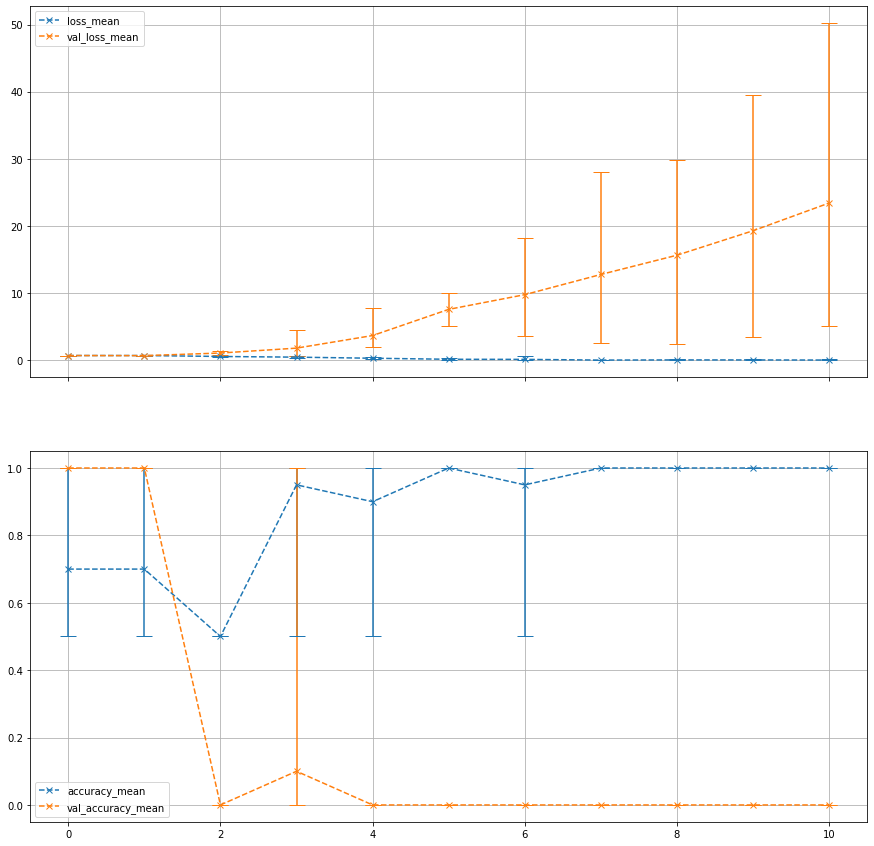

In [130]:
histories_df = pd.DataFrame(histories_wcircle)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)


# Displace training triangle by a few pixel

How does the triangle's position influence training?

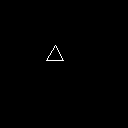

In [30]:
disp = 5

im_triangle_disp = Image.new('1', (128, 128), 0)
draw = ImageDraw.Draw(im_triangle_disp)
draw.regular_polygon((50+disp, 50+disp, 10), 3, rotation=0, fill=None, outline=1)
display(im_triangle_disp)

train_image_triangle_disp = np.array(im_triangle_disp, dtype=np.double)
train_image_triangle_disp = np.expand_dims(train_image_triangle_disp, axis=0)
train_image_triangle_disp = np.expand_dims(train_image_triangle_disp, axis=train_image_triangle_disp.ndim)

train_label_triangle = np.array((1))
train_label_triangle = np.expand_dims(train_label_triangle, axis=0)

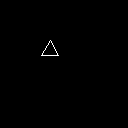

In [31]:
display(im_triangle)

In [32]:
train_images = np.concatenate((train_image_triangle_disp, train_image_circle), axis=0)
train_labels = np.concatenate((train_label_triangle, train_label_circle), axis=0)

In [33]:
model.set_weights(winit)
evalinit_train = model.evaluate(x=train_images, y=train_labels)
print(evalinit_train)
print(model.metrics_names)

1/1 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 1.0000
[0.691411018371582, 1.0]
['loss', 'accuracy']


In [34]:
model.set_weights(winit)
history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))


Epoch 1/10
1/1 [==============================] - 0s 50ms/step - loss: 0.6914 - accuracy: 1.0000 - val_loss: 0.6558 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5690 - accuracy: 0.5000 - val_loss: 0.6754 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 0.4158 - accuracy: 0.5000 - val_loss: 0.8096 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 0.3367 - accuracy: 1.0000 - val_loss: 1.3607 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.2308 - accuracy: 1.0000 - val_loss: 3.4855 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 47ms/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 8.3469 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 15.6253 - val_accuracy: 0.0000e+00
Epoch 

In [35]:
print(model.predict(train_images))
print(model.predict(test_image_triangle_lowleft))

[[9.9999124e-01]
 [6.8234867e-14]]
[[3.287337e-17]]


<AxesSubplot:>

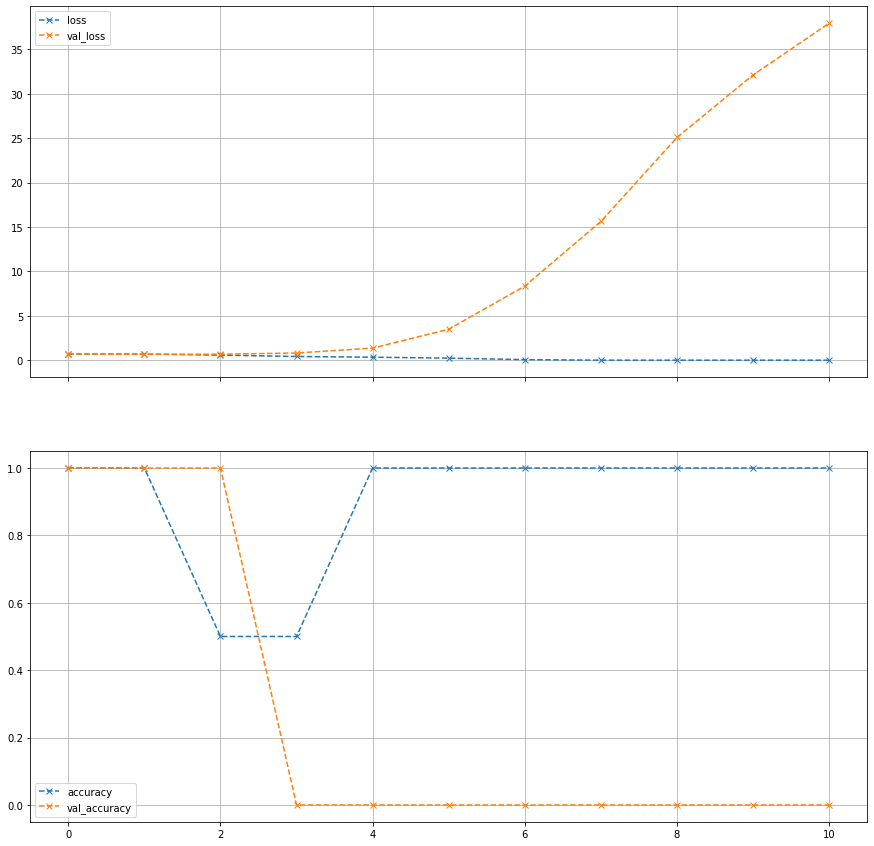

In [36]:
hist = copy.deepcopy(history_inclval.history)
for init_val, name in zip(evalinit_train, model.metrics_names):
    hist[name].insert(0, init_val)
test_metrics_names = [f'val_{name}' for name in model.metrics_names]
for init_val, name in zip(evalinit_test_triangle_lowleft, test_metrics_names):
    hist[name].insert(0, init_val)
    
history_inclval_df = pd.DataFrame(hist)
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
history_inclval_df.plot(y=['loss', 'val_loss'], ax=axs[0], grid=True, marker='x', ls='--')
history_inclval_df.plot(y=['accuracy', 'val_accuracy'], ax=axs[1], grid=True, marker='x', ls='--')

## test dependency on weight initialization

In [37]:
histories_disp = {}
metrics_per_hist = 4
num_histories = len(histories_disp) // metrics_per_hist
for runid in range(num_histories, num_histories + 5):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_train, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories_disp.update(hist)

1/1 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.0000e+00
Epoch 1/10
1/1 [==============================] - 0s 51ms/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6806 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 30ms/step - loss: 0.5260 - accuracy: 0.5000 - val_loss: 0.8399 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 53ms/step - loss: 0.3933 - accuracy: 1.0000 - val_loss: 1.5101 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 30ms/step - loss: 0.3128 - accuracy: 1.0000 - val_loss: 4.1892 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 30ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 10.3141 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 0.1412 - accuracy: 1.0000 - val_loss: 8.1676 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 30m

<AxesSubplot:>

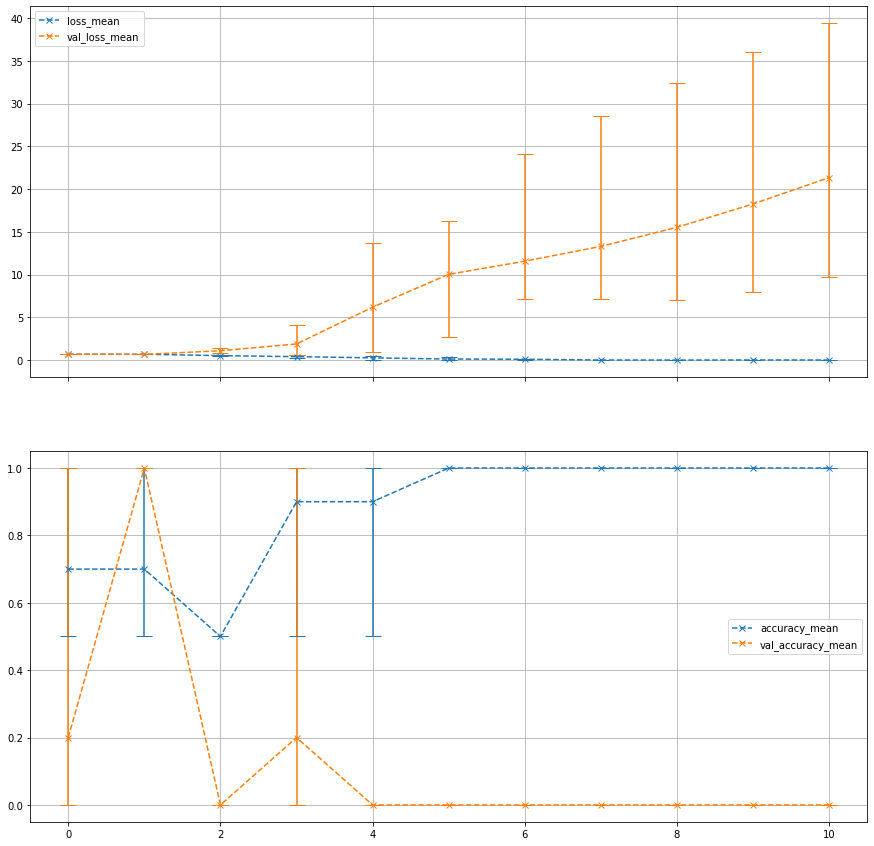

In [38]:
histories_df = pd.DataFrame(histories_disp)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)


Just moving the triangle a bit does not resolve the situation.

# Multiple slightly displaced triangles

In [39]:
from itertools import product

In [43]:
img = []
images = []
labels = []

disp_start = -4
disp_stop = 4
for disp_x, disp_y in product(range(disp_start, disp_stop), range(disp_start, disp_stop)):
    
    im_triangle_disp = Image.new('1', (128, 128), 0)
    draw = ImageDraw.Draw(im_triangle_disp)
    draw.regular_polygon((50+disp_x, 50+disp_y, 10), 3, rotation=0, fill=None, outline=1)
    #display(im_triangle_disp)
    img.append(im_triangle_disp)

    train_image_triangle_disp = np.array(im_triangle_disp, dtype=np.double)
    train_image_triangle_disp = np.expand_dims(train_image_triangle_disp, axis=0)
    train_image_triangle_disp = np.expand_dims(train_image_triangle_disp, axis=train_image_triangle_disp.ndim)

    train_label_triangle = np.array((1))
    train_label_triangle = np.expand_dims(train_label_triangle, axis=0)
    
    images.append(train_image_triangle_disp)
    labels.append(train_label_triangle)
train_images = np.concatenate(images, axis=0)
train_labels = np.concatenate(labels, axis=0)
train_images = np.concatenate((train_images, train_image_circle), axis=0)
train_labels = np.concatenate((train_labels, train_label_circle), axis=0)

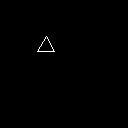

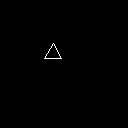

In [44]:
display(img[0])
display(img[-1])

In [49]:
#histories_disp = {}
metrics_per_hist = 4
num_histories = len(histories_disp) // metrics_per_hist
for runid in range(num_histories, num_histories + 5):
    tf.keras.backend.clear_session()
    model = get_model()

    evalinit_train = model.evaluate(x=train_images, y=train_labels)
    evalinit_test = model.evaluate(x=test_image_triangle_lowleft, y=test_labels_triangle_lowleft)

    history_inclval = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_image_triangle_lowleft, test_labels_triangle_lowleft))

    hist = copy.deepcopy(history_inclval.history)
    for init_val, name in zip(evalinit_train, model.metrics_names):
        hist[name].insert(0, init_val)
    test_metrics_names = [f'val_{name}' for name in model.metrics_names]
    for init_val, name in zip(evalinit_test, test_metrics_names):
        hist[name].insert(0, init_val)

    hist = {f'{k}_{runid}': v for (k, v) in hist.items()}
    histories_disp.update(hist)

1/1 [==============================] - 0s 1000us/step - loss: 0.6900 - accuracy: 1.0000
Epoch 1/10
3/3 [==============================] - 1s 367ms/step - loss: 0.4255 - accuracy: 0.6769 - val_loss: 1.5137e-09 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 360ms/step - loss: 0.5087 - accuracy: 0.9846 - val_loss: 9.3226e-07 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 361ms/step - loss: 0.1118 - accuracy: 0.9846 - val_loss: 0.6905 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 422ms/step - loss: 0.0107 - accuracy: 0.9846 - val_loss: 0.6903 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 394ms/step - loss: 0.0130 - accuracy: 0.9846 - val_loss: 0.6901 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 400ms/step - loss: 0.0108 - accuracy: 0.9846 - val_loss: 0.6900 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 444ms/step 

10


<AxesSubplot:>

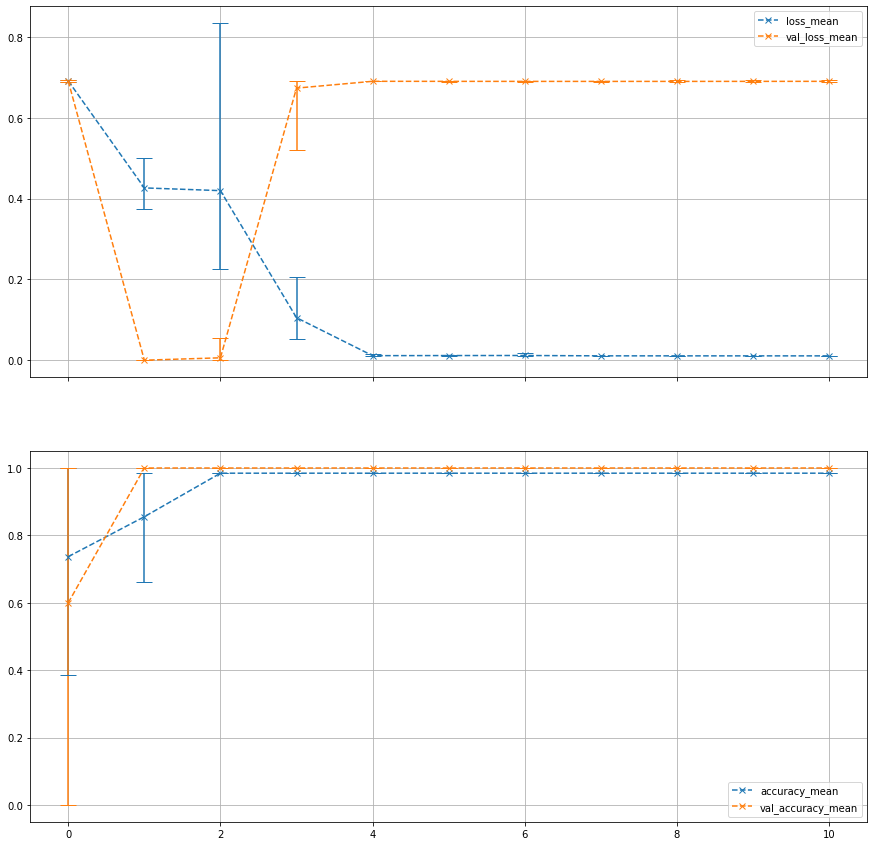

In [50]:
print(len(histories_disp) // metrics_per_hist)

histories_df = pd.DataFrame(histories_disp)
cols = [c.split('_') for c in histories_df.columns]
newcols = [(c[-1], '_'.join(c[:2]) if len(c) == 3 else c[0]) for c in cols]
histories_df.columns = pd.MultiIndex.from_tuples(newcols)
histories_grouped = histories_df.groupby(level=1, axis='columns')
histories_agg = histories_grouped.mean().join(histories_grouped.std(), lsuffix='_mean', rsuffix='_std')
histories_min = histories_grouped.min()
histories_max = histories_grouped.max()
#print(histories_agg)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 15))
loss_cols = [col for col in histories_agg.columns if 'loss_mean' in col]
#loss_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in loss_cols}
loss_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in loss_cols}
accuracy_cols = [col for col in histories_agg.columns if 'accuracy_mean' in col]
#accuracy_errs = {c: histories_agg[c.replace('_mean', '_std')] for c in accuracy_cols}
accuracy_errs = {c: [histories_agg[c] - histories_min[c.replace('_mean', '')], histories_max[c.replace('_mean', '')] - histories_agg[c]] for c in accuracy_cols}
histories_agg.plot(y=loss_cols, ax=axs[0], grid=True, marker='x', ls='--', yerr=loss_errs, capsize=8)
histories_agg.plot(y=accuracy_cols, ax=axs[1], grid=True, marker='x', ls='--', yerr=accuracy_errs, capsize=8)
